<a href="https://colab.research.google.com/github/juangui96/DS-_-Boot-Camp/blob/main/Avance_Proyecto_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Data Set: Super Store
Objetivo: Predecir cuales seran las ventas en los proximos periodos de tiempo de los principales clientes, zonas y categoria de productos que se tiene en el momento partiendo de una definicion de estado actual de las ventas.

# Cargue Librerias

In [252]:
#importar librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [253]:
#Librerias Plotly
! pip install chart_studio
import plotly.express as px
import plotly.graph_objects as go
import chart_studio.plotly as py


# Cargar datos

In [254]:
#Cargar base
url = 'https://raw.githubusercontent.com/juangui96/DS-_-Boot-Camp/main/Proyecto_Final/Actividad_1/super%20Store%20.csv'
ss = pd.read_csv(url, sep = ';')
ss.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9.575.775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368


Al validar se evidencia que no hay informacion nula en el DataFrame cargado

In [255]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9799 non-null   int64  
 1   Order ID       9799 non-null   object 
 2   Order Date     9799 non-null   object 
 3   Ship Date      9799 non-null   object 
 4   Ship Mode      9799 non-null   object 
 5   Customer ID    9799 non-null   object 
 6   Customer Name  9799 non-null   object 
 7   Segment        9799 non-null   object 
 8   Country        9799 non-null   object 
 9   City           9799 non-null   object 
 10  State          9799 non-null   object 
 11  Postal Code    9788 non-null   float64
 12  Region         9799 non-null   object 
 13  Product ID     9799 non-null   object 
 14  Category       9799 non-null   object 
 15  Sub-Category   9799 non-null   object 
 16  Product Name   9799 non-null   object 
 17  Sales          9794 non-null   object 
dtypes: float

Validando y corrigiendo valores NaN para la columna Sales:

In [256]:
ss = pd.DataFrame(ss)
null_columns=ss.columns[ss.isnull().any()]
ss[null_columns].isnull().sum()
print(ss[ss.isnull().any(axis=1)][null_columns].head())


      Postal Code Sales
429       28052.0   NaN
430       28052.0   NaN
1405      19143.0   NaN
1968      74133.0   NaN
1970      60623.0   NaN


In [257]:

for i in range(len(ss['Sales'])):
  if pd.isna(ss['Sales'][i]) == True:
    ss['Sales'][i] = 0


<ipython-input-257-ecda44a4b17c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-257-ecda44a4b17c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-257-ecda44a4b17c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-257-ecda44a4b17c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

**Correccion formato Ventas**
"Noramliza" el valor de las ventas, dado que se encuentran separadas por puntos y no comas, generando un error de formarto al tratar de realizar operaciones matematicas. Por lo anterior, se realiza el supuesto de que las ventas estan en millones de unidades vendidas

In [258]:
ss['Sales2'] = ss['Sales'].str.replace('.','')
ss['Sales2'] = ss['Sales2'].astype(float)/1000000
ss.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Sales2
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,0.026196
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,0.073194
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,0.001462


Validando y corrigiendo valores NaN para la columna Sales2:

In [259]:
for i in range(len(ss['Sales2'])):
  if pd.isna(ss['Sales2'][i]) == True:
    ss['Sales2'][i] = 0


<ipython-input-259-e7e1ddd6d26a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-259-e7e1ddd6d26a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-259-e7e1ddd6d26a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-259-e7e1ddd6d26a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

In [260]:
ss.describe()

,Row ID,Postal Code,Sales2
count,9799.000000,9788.000000,9799.000000
mean,4900.981529,55272.581937,0.113620
std,2828.903385,32042.776540,0.521891
min,1.000000,1040.000000,0.000000
25%,2451.500000,23223.000000,0.002530
50%,4901.000000,58103.000000,0.011096
75%,7350.500000,90008.000000,0.053991
max,9800.000000,99301.000000,23.962656


# Clientes
Antes de realizar un analisis sobre las ventas por clientes, es importante conocer informacion general sobre esta variable

Mediante algunas medidas de tendencia centran se puede apreciar que hay cleintes que tienen una gran cantidad de ventas asociadas, asi mismo, se puede apreciar que el total de ventas registras corresponde a 9794

In [261]:
ss2 = ss.pivot(columns='Customer Name',values = 'Sales2')
ss2 = ss2.describe()
ss2t = ss2.transpose().reset_index()
ss2t = ss2t.sort_values(by = 'count', ascending = False)
ss2t

,Customer Name,count,mean,std,min,25%,50%,75%,max
787,William Brown,35.0,0.112479,0.217597,0.001168,0.004807,0.010584,0.106140,0.892136
502,Matt Abelman,34.0,0.068969,0.178116,0.000198,0.002398,0.006525,0.026888,0.799984
595,Paul Prost,34.0,0.036273,0.053072,0.000352,0.004944,0.016120,0.037518,0.234882
387,John Lee,33.0,0.173800,0.549752,0.000468,0.001592,0.008626,0.054666,2.624985
391,Jonathan Doherty,32.0,0.046449,0.094692,0.000102,0.000815,0.005144,0.044900,0.408006
...,...,...,...,...,...,...,...,...,...
721,Sung Chung,1.0,0.014112,NaN,0.014112,0.014112,0.014112,0.014112,0.014112
123,Carl Jackson,1.0,0.001652,NaN,0.001652,0.001652,0.001652,0.001652,0.001652
53,Anthony O'Donnell,1.0,0.016128,NaN,0.016128,0.016128,0.016128,0.016128,0.016128
378,Jocasta Rupert,1.0,0.086388,NaN,0.086388,0.086388,0.086388,0.086388,0.086388


In [262]:
#cantidad total de ventas
sum(ss2t['count'])

9799.0

In [263]:
#total de ventas
sum(ss['Sales2'])

1113.3633910000008

In [264]:
#promedio de cantidad de ventas por cliente
from statistics import mean
avg_qvtaxclt = mean(ss2t['count'])
avg_qvtaxclt

12.35687263556116

In [265]:
#promedio de ventas
avg_vtaxclt = mean(ss['Sales2'])
avg_vtaxclt


0.11362010317379324

In [266]:
ss2t['Comparacion Prom Q Ventas'] = ['Por encima prom Q ventas' if x>= avg_qvtaxclt else 'Por debajo prom Q Ventas ' for x in ss2t['count']]


In [267]:
ss2t['Comparacion Valor Ventas'] = ['Por encima venta prom' if x>= avg_vtaxclt else 'Por debajo venta prom' for x in ss2t['mean']]

In [268]:
# filtro1 = ss2t[(ss2t['Comparacion Prom Q Ventas']=='Por encima prom Q ventas')&(ss2t['Comparacion Valor Ventas']=='Por encima venta prom')]
# filtro1

# **HIPOTESIS 1**
Los clientes que generan una mayor cantitdad de ventas son clientes con un proemdio de valor de venta mayor

In [269]:
px.scatter(ss2t, x='mean',y='count', color = 'Customer Name',size = 'mean',
           labels = {'count':'Cantidad de ventas','mean':'Ventas promedio(Millones)'},
           title = 'Cantidad de Ventas vs Promedio de venta por cliente',
           template = 'simple_white')

Para responde a la pregunta anterior, se propone un scatterplot en donde se evidencia que la mayoria de puntos no se agrupa en el cuadrante I, es decir en la parte superior derecha del grafico. Los puntos que representan las ventas con mayor valor se enceuntran ubicados en la parte inferior derecha (cudrante II) lo que quiere decir que son ventas por mayor valor economico pero en menor cantidad. Esto se comprueba al revisar la tabla ss2t en donde al organizar por el conteo de ventas,s e evidencia que no mas los 5 primeros clientes estan por debajo del valor de la venta.


In [270]:
ss2t

,Customer Name,count,mean,std,min,25%,50%,75%,max,Comparacion Prom Q Ventas,Comparacion Valor Ventas
787,William Brown,35.0,0.112479,0.217597,0.001168,0.004807,0.010584,0.106140,0.892136,Por encima prom Q ventas,Por debajo venta prom
502,Matt Abelman,34.0,0.068969,0.178116,0.000198,0.002398,0.006525,0.026888,0.799984,Por encima prom Q ventas,Por debajo venta prom
595,Paul Prost,34.0,0.036273,0.053072,0.000352,0.004944,0.016120,0.037518,0.234882,Por encima prom Q ventas,Por debajo venta prom
387,John Lee,33.0,0.173800,0.549752,0.000468,0.001592,0.008626,0.054666,2.624985,Por encima prom Q ventas,Por encima venta prom
391,Jonathan Doherty,32.0,0.046449,0.094692,0.000102,0.000815,0.005144,0.044900,0.408006,Por encima prom Q ventas,Por debajo venta prom
...,...,...,...,...,...,...,...,...,...,...,...
721,Sung Chung,1.0,0.014112,NaN,0.014112,0.014112,0.014112,0.014112,0.014112,Por debajo prom Q Ventas,Por debajo venta prom
123,Carl Jackson,1.0,0.001652,NaN,0.001652,0.001652,0.001652,0.001652,0.001652,Por debajo prom Q Ventas,Por debajo venta prom
53,Anthony O'Donnell,1.0,0.016128,NaN,0.016128,0.016128,0.016128,0.016128,0.016128,Por debajo prom Q Ventas,Por debajo venta prom
378,Jocasta Rupert,1.0,0.086388,NaN,0.086388,0.086388,0.086388,0.086388,0.086388,Por debajo prom Q Ventas,Por debajo venta prom


# **HIPOTESIS 2**
Existe un mes en el horizonte de tiempo en donde las ventas son pico

Se evdiencia que el tipo de dato de la orden date no es de fecha y tiempo, se debe, en primera medida, realizar esta conversion para realizar la grafica

In [271]:
ss.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales             object
Sales2           float64
dtype: object

In [272]:
ss2 = ss
ss_h2 = ss2
ss_h2['Order Date']

0        8/11/2017
1        8/11/2017
2       12/06/2017
3       11/10/2016
4       11/10/2016
           ...    
9794    21/05/2017
9795    12/01/2016
9796    12/01/2016
9797    12/01/2016
9798    12/01/2016
Name: Order Date, Length: 9799, dtype: object

In [273]:
ss_h2['Order Date2'] = pd.to_datetime(ss_h2['Order Date'],format='%d/%m/%Y')
ss_h2['Mes Venta'] = ss_h2['Order Date2'].dt.month
ss_h2['Año Venta'] = ss_h2['Order Date2'].dt.year

ss_h2.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Sales2,Order Date2,Mes Venta,Año Venta
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,0.026196,2017-11-08,11,2017
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,0.073194,2017-11-08,11,2017


In [274]:
filtro1_h2 = pd.DataFrame(ss_h2.groupby(['Mes Venta','Año Venta'])['Sales2'].sum().reset_index())
filtro1_h2.head(4)

,Mes Venta,Año Venta,Sales2
0,1,2015,2.882798
1,1,2016,23.146257
2,1,2017,8.077210
3,1,2018,16.985532


Text(0, 0.5, 'Ventas en millones')

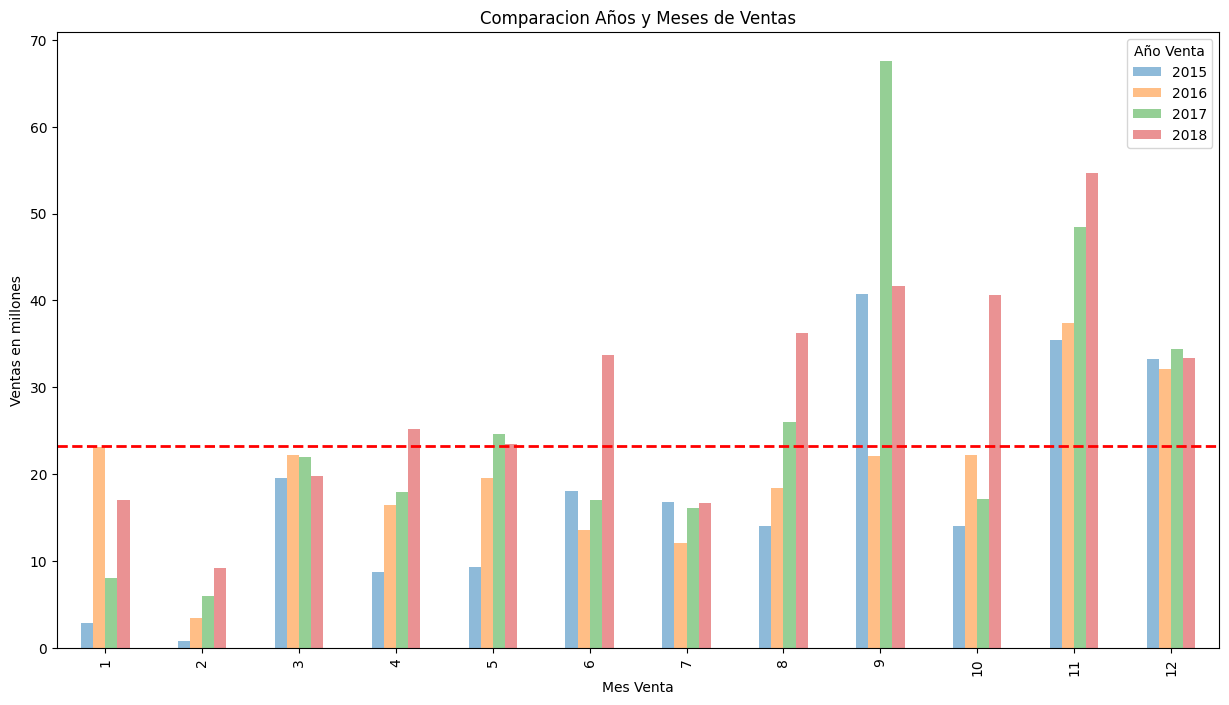

In [275]:
filtro2_h2 = filtro1_h2.pivot(columns='Año Venta', index='Mes Venta',  values='Sales2')
filtro2_h2

a = filtro2_h2.plot(kind='bar', alpha = 0.5, figsize=(15,8), title = 'Comparacion Años y Meses de Ventas')
a.axhline(y=(mean(filtro1_h2['Sales2'])), color='r', linestyle='--', linewidth=2, label ='Ventas promedio por mes')
a.set_ylabel('Ventas en millones')

Mediante la grafica anterior y la siguiente, se puede comprobar rapidamente que la hipotesis es correcta, el mes de Septiembre y Noviembre son los que tienen picos mas altos en cuanto a ventas. Se puede ver que el valor de ventas de los ultimos 6 meses del año esta por encima del valor de la venta promedio mes. Asi mismo Julio y Septiembre son los meses en donde menor actividad comercial se registra.


In [276]:
fig = px.bar(filtro1_h2, y ='Sales2', x='Mes Venta',color='Año Venta', title = 'Comparacion años y meses de Venta', labels = {'Sales2':'Ventas(Millones)'})
fig

# **HIPOTESIS 3**
La diferencia entre el order date y el ship date depende de la categoria del ship mode


In [277]:
ss_h3 = ss
ss_h3['Order Date2'] = pd.to_datetime(ss_h3['Order Date'],format='%d/%m/%Y')
ss_h3['Ship Date2'] = pd.to_datetime(ss_h3['Ship Date'],format='%d/%m/%Y')
ss_h3['Dif'] =ss['Ship Date2'] - ss_h3['Order Date2']
ss_h3.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Sales2,Order Date2,Mes Venta,Año Venta,Ship Date2,Dif
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,0.026196,2017-11-08,11,2017,2017-11-11,3 days
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,0.073194,2017-11-08,11,2017,2017-11-11,3 days


In [278]:
ss_h3['Dif2'] = ss['Dif']
ss_h3['Dif2'] = ss_h3['Dif2'].dt.days
ss_h3.dtypes
filtro1_h3 = pd.DataFrame(ss_h3.groupby(['Ship Mode','Dif2'])['Row ID'].count().reset_index())
filtro1_h3 = filtro1_h3.rename(columns = {'Row ID':'Cantidad de Ventas'})
filtro1_h3

,Ship Mode,Dif2,Cantidad de Ventas
0,First Class,1,338
1,First Class,2,557
2,First Class,3,605
3,First Class,4,1
4,Same Day,0,514
5,Same Day,1,24
6,Second Class,1,1
7,Second Class,2,738
8,Second Class,3,372
9,Second Class,4,367


In [279]:
filtro2_h3 = ss_h3[['Ship Mode','Dif2']]
px.box(filtro2_h3,x='Ship Mode',y='Dif2', points ='all' )

<Axes: xlabel='Dif2', ylabel='Density'>

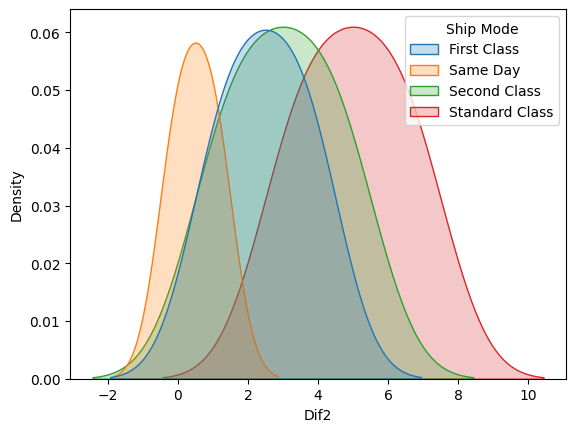

In [280]:
ax = sns.kdeplot(x='Dif2', hue='Ship Mode', data=filtro1_h3, fill=True)
ax

Mediante las graficas anteriores, se demuestra que, aparentemente la diferencia entre ship date y order date si depende del ship mode. A partir del box plot se puede ver que cada categoria tiene una media distinta y una variabilidad diferente.
Los ship mode, standard class y second class comparten las misma variabilidad de dos dias, sin embargo el valor de la media es muy distinto, siendo de 5 y 3 dias respectivamente. Por otro lado, same day tiene una menor variabilidad sin embargo se resalta que hay ventas que no se entregaron el mismo dia a pesar de estar en esta categoria, tomando un tiempo maximo de envio de 1 dia.
 Lo anterior se complementa al revisar el segundo grafico, dado que cada campana tiene una ubicacion distinta, lo que indica que tienen variabilidades y medias diferentes. De no depende una variable de la otra, todas deberian compartir la misma ubicacion en el grafico

# **HIPOTESIS 4**
Existe una alta variabilidad para el set de datos que se esta analizando. Las ventas son proporcionales a la variabilidad.


In [281]:
ss3 = ss[['Order Date','Region','State','Category','Sales2']]
ss3['Order Date2']= pd.to_datetime(ss3['Order Date'],format='%d/%m/%Y')
ss3['Mes Venta'] = ss3['Order Date2'].dt.month
ss3['Año Venta'] = ss3['Order Date2'].dt.year

<ipython-input-281-3a88f707e6c1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-281-3a88f707e6c1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-281-3a88f707e6c1>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [282]:
ss_h4 = pd.DataFrame(ss3.groupby(['Mes Venta','Año Venta'])['Sales2'].describe().reset_index())
ss_h4.head(2)

,Mes Venta,Año Venta,count,mean,std,min,25%,50%,75%,max
0,1,2015,77.0,0.037439,0.071482,0.000193,0.001278,0.005723,0.039198,0.333999
1,1,2016,57.0,0.406075,1.876504,0.000296,0.002904,0.010368,0.061584,13.523976


<Axes: xlabel='Mes Venta', ylabel='std'>

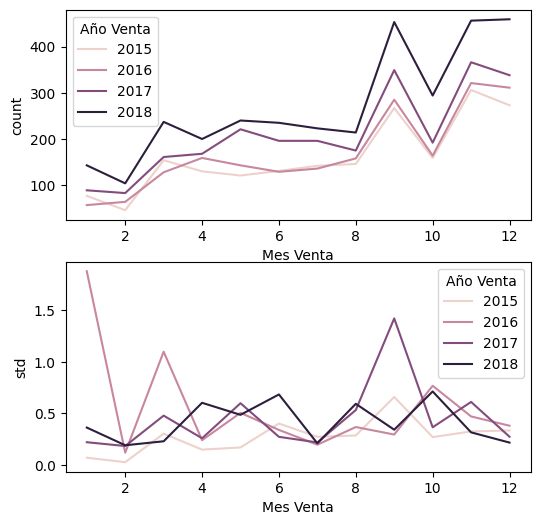

In [283]:
fig,ax = plt.subplots(nrows = 2, ncols=1, figsize=(6,6))
sns.lineplot(ss_h4, x ='Mes Venta', y = 'count', hue = 'Año Venta', ax=ax[0])
sns.lineplot(ss_h4, x ='Mes Venta', y = 'std', hue = 'Año Venta',ax=ax[1])

In [284]:
ss2_h4 = ss3[['Sales2','Año Venta','Mes Venta']]
px.box(ss2_h4,y='Sales2',color='Año Venta',points='all')

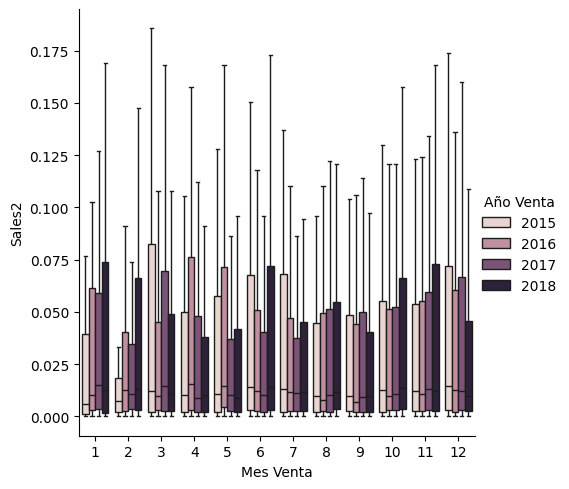

In [285]:
sns.catplot(x='Mes Venta',y='Sales2',hue='Año Venta',data=ss2_h4, kind ='box',showfliers=False)

In [286]:
ss3_h4 = ss3.groupby('Año Venta')['Sales2'].describe()
ss3_h4

,count,mean,std,min,25%,50%,75%,max
Año Venta,,,,,,,,
2015,1952.0,0.109446,0.362772,0.000000,0.002368,0.011147,0.056064,8.159952
2016,2055.0,0.118116,0.575936,0.000005,0.002592,0.010896,0.054998,13.523976
2017,2534.0,0.120575,0.658937,0.000000,0.002599,0.011232,0.052328,23.962656
2018,3258.0,0.107876,0.439973,0.000000,0.002511,0.010950,0.051996,11.199968


Al analizar los datos anteriores y en especial el conteo de ventas en el tiempo, se puede ver que existe una tendencia estacional; en los 4 años del analisis, se muestran picos (superiores en septiembre e inferiores en octubre). Posterior a lo cual se presenta un incremento para los meses de diciembre y enero.
Por su parte, la variabilidad tiende a variar en el tiempo, aumentandose en los meses en donde las ventas crecen. Lo anterior se complementa al revisar la grafica de densidad de puntos en donde hay unos outliers bastante altos para cada año. Al revisar la grafica de box plot mensual, se evidencia que los meses 3 , 1, 7 y 6 son los que mayor variabilidad presentan. La media es bastante variable en especial en el mes de enero. La ultima tabla en donde se tienen los principales descriptores estadisticos de las ventas por año, muestra que, la variabilidad mas alta corresponde al año en donde se presentan ventas mas alta pero no mayor cantidad.  

# HIPOTESIS 5

Los productos tienen  ventas complementarias entre los meses del analisis

In [287]:
ss4= ss3[['Mes Venta','Sales2','Año Venta','Category']]
ss4

,Mes Venta,Sales2,Año Venta,Category
0,11,0.026196,2017,Furniture
1,11,0.073194,2017,Furniture
2,6,0.001462,2017,Office Supplies
3,10,9.575775,2016,Furniture
4,10,0.022368,2016,Office Supplies
...,...,...,...,...
9794,5,0.003798,2017,Office Supplies
9795,1,0.010368,2016,Office Supplies
9796,1,0.235188,2016,Technology
9797,1,0.026376,2016,Technology


In [288]:
ss4_h5=pd.DataFrame(ss4.groupby(['Mes Venta','Category','Año Venta'])['Sales2'].sum().reset_index())
ss4_h5.head(4)

,Mes Venta,Category,Año Venta,Sales2
0,1,Furniture,2015,1.329197
1,1,Furniture,2016,20.059970
2,1,Furniture,2017,3.370981
3,1,Furniture,2018,2.839139


In [289]:
ss5_h5=pd.DataFrame(ss4.groupby(['Mes Venta','Category'])['Sales2'].sum().reset_index())
px.line(ss5_h5,x='Mes Venta',y='Sales2',color='Category')

In [290]:
filtro1_h5 =ss4_h5[ss4_h5['Año Venta']==2015]
filtro2_h5 =ss4_h5[ss4_h5['Año Venta']==2016]
filtro3_h5 =ss4_h5[ss4_h5['Año Venta']==2017]
filtro4_h5 =ss4_h5[ss4_h5['Año Venta']==2018]

filtro1_h5.head(3)

,Mes Venta,Category,Año Venta,Sales2
0,1,Furniture,2015,1.329197
4,1,Office Supplies,2015,1.253258
8,1,Technology,2015,0.300343


Text(0, 0.5, 'Ventas en 2018')

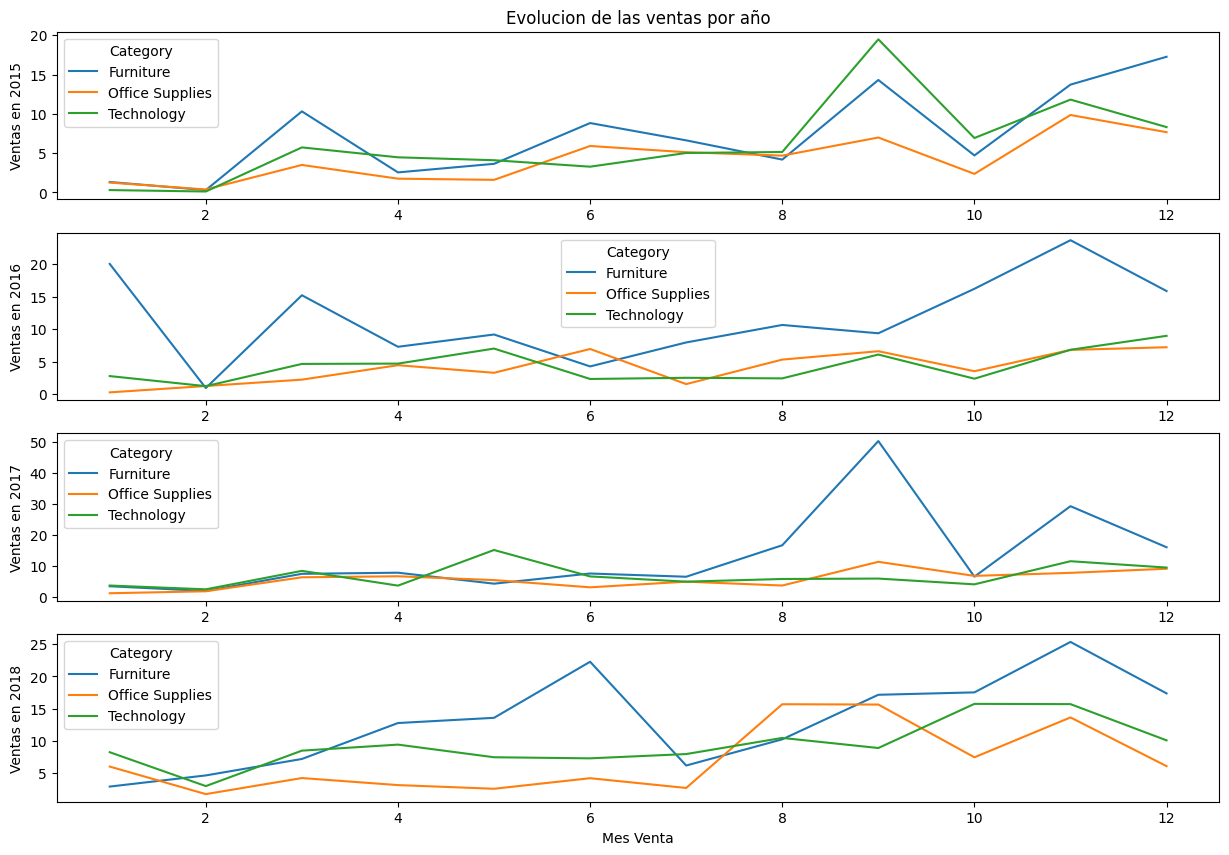

In [291]:
fig,ax = plt.subplots(nrows = 4, ncols=1, figsize=(15,10))
sns.lineplot(data=filtro1_h5,x='Mes Venta',y='Sales2',hue='Category',ax=ax[0])
sns.lineplot(data=filtro2_h5,x='Mes Venta',y='Sales2',hue='Category',ax=ax[1])
sns.lineplot(data=filtro3_h5,x='Mes Venta',y='Sales2',hue='Category',ax=ax[2])
sns.lineplot(data=filtro4_h5,x='Mes Venta',y='Sales2',hue='Category',ax=ax[3])

ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('')
ax[3].set_xlabel('Mes Venta')

ax[0].set_ylabel('Ventas en 2015')
ax[1].set_ylabel('Ventas en millones')
ax[2].set_ylabel('Ventas en millones')
ax[3].set_ylabel('Ventas en millones')


ax[0].set_title('Evolucion de las ventas por año')
ax[1].set_ylabel('Ventas en 2016')
ax[2].set_ylabel('Ventas en 2017')
ax[3].set_ylabel('Ventas en 2018')


Al revisar el comportamiento de las ventas totalizados por mes, se ve que la categoria furniture tiene unas ventas mucho mayores a las otras dos, por lo que en general no tiene un mes en donde sus ventas disminuyan y las de las demas categorias aumenta, unicamente hay un mes (Mayo) en donde se presenta este comportamiento con las ventas de tecnologia. Por otro lado, esta ultima categoria si presenta un comportamiento de ventas complementario con office supplies, en especial en los meses de: Abril, Mayo, Junio, Julio y Agosto (es importante resaltar que la diferencia entre estas dos categorias es bastante notoria, en especial, en el primer semestre de los años analizados). Finalmente, al revisar las graficas en donde estan las ventas anualizadas se encuentra que:
- En 2015 las ventas de furniture fueron superadas por las de office supllies, y en general, las 3 categorias presentaban un comportamiento similar, con ventas complementarias en abrilmayo y junio.
- A partir de 2016 la categoria Furniture resalta sobre las demas. Es decir, el total de sus ventas mensuales es mucho mayor al de las demas categorias. Lo que muestra ventas complementarias en octubre, marzo , mayo y julio.
- El año 2017 en el mes de septiembre se presenta el pico mas alto de ventas (para todos los meses y años) en la categoria furniture lo que puede llevar a pensar que es un dato atipico. Este año presetna venta complmenetarias entre office supplies y technology en abril, mayo, junio, agosto, septiembre
- El ultimo añoñ del analsisi, musetra un comportamiento al alza en especial durante el segundo semeestre del año. En general hay ventas complementarias en el mes de junio (entre furnitrue y las otras dos catgeorias), en agosto (entre officel supplies y las demas categorias) y en octubre (entre technology y las demas categorias). Se puede decir que este añ es el que mejor comportamiento presenta.